In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
import cv2
import seaborn as sns
from pca import *

# Task 1

read and plot data

In [137]:
data1 = pd.read_csv("pca_dataset.txt", delimiter=" ", header=None).to_numpy()

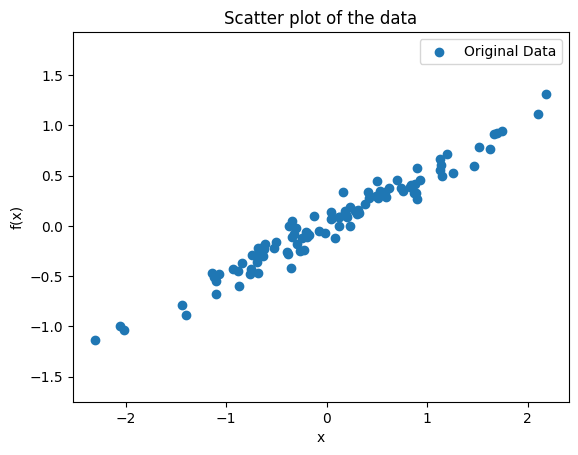

In [138]:
plt.scatter(data1[:, 0], data1[:, 1],color='tab:blue', label='Original Data')
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()

Center the data

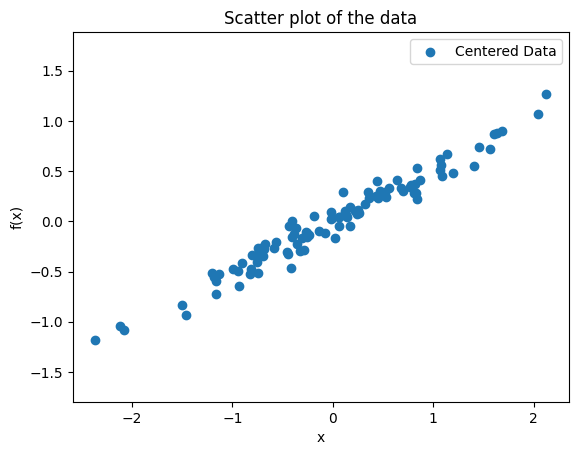

In [139]:
data1_mean = data1.mean(axis=0)
data1_centered = data1 - data1_mean
plt.scatter(data1_centered[:, 0], data1_centered[:, 1], color='tab:blue', label='Centered Data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axis("equal")
plt.title("Scatter plot of the data")
plt.legend()

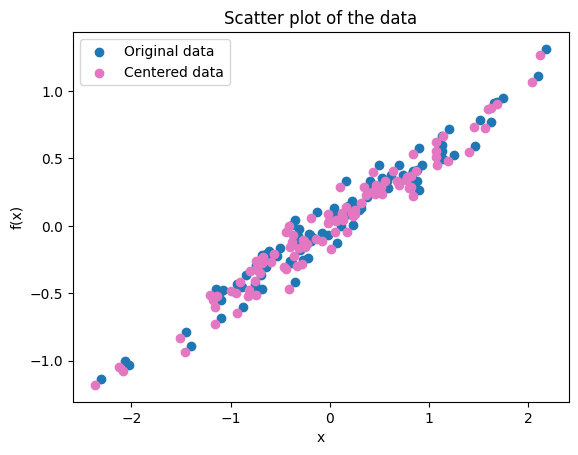

In [228]:
# plot the centered data vs the original one
plt.scatter(data1[:, 0], data1[:, 1], color='tab:blue', label='Original data')
plt.scatter(data1_centered[:, 0], data1_centered[:, 1], color='tab:pink', label='Centered data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()

svd and calculate the energy for each component

In [144]:
U1, S1, Vh1, energy1 = pca(data1) 

add the direction of the two principal components

Text(0.5, 1.0, 'The directions of the 2 principal components')

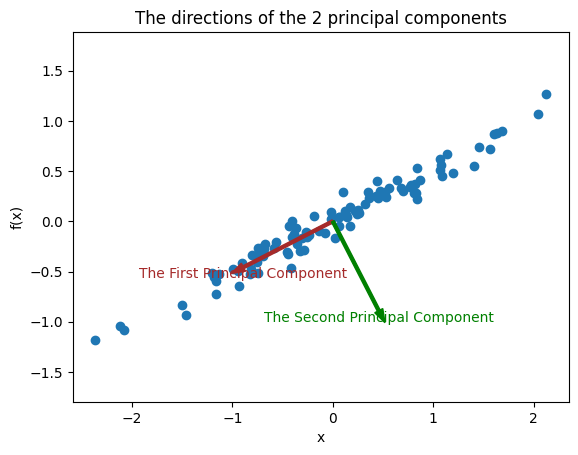

In [230]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data1_centered[:, 0], data1_centered[:, 1])
ax.arrow(0, 0, Vh1[0,0], Vh1[0,1], width = 0.03, color='brown')
ax.arrow(0, 0, Vh1[1,0], Vh1[1,1], width = 0.03, color='green')
ax.text(Vh1[0][0], Vh1[0][1], 'The First Principal Component', horizontalalignment='center', verticalalignment='top', color='brown')
ax.text(Vh1[1][0], Vh1[1][1], 'The Second Principal Component', horizontalalignment='center', verticalalignment='top', color='green')
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.title("The directions of the 2 principal components")

In [122]:
pc1_energy = energy1[0]
pc2_energy = energy1[1]
print(f"the first Principal Component contains energy: {round(pc1_energy*100, 2)}%")
print(f"the second Principal Component contains energy: {round(pc2_energy*100, 2)}%")

the first Principal Component contains energy: 99.31%
the second Principal Component contains energy: 0.69%


# Task 2

load and rescale the image

(185, 249)


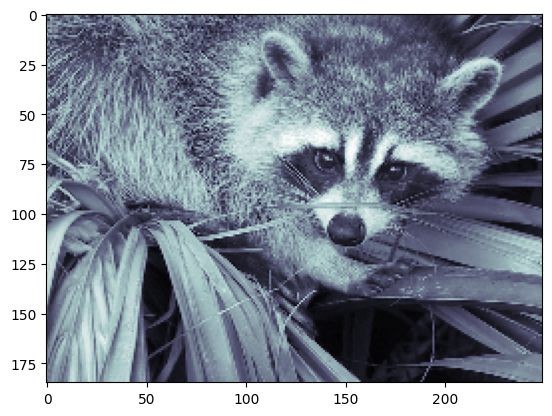

In [175]:
data2 = cv2.resize(data2, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
print(data2.shape)
plt.imshow(data2, cmap='bone')

svd and calculate the energy for each component

In [176]:
U2, S2, Vh2, energy2 = pca(data2)

 L= all : Energy 100.0% and Energy loss -0.0%
 L= 120 : Energy 99.04% and Energy loss 0.96%
 L= 50 : Energy 91.83% and Energy loss 8.17%
 L= 10 : Energy 72.73% and Energy loss 27.27%


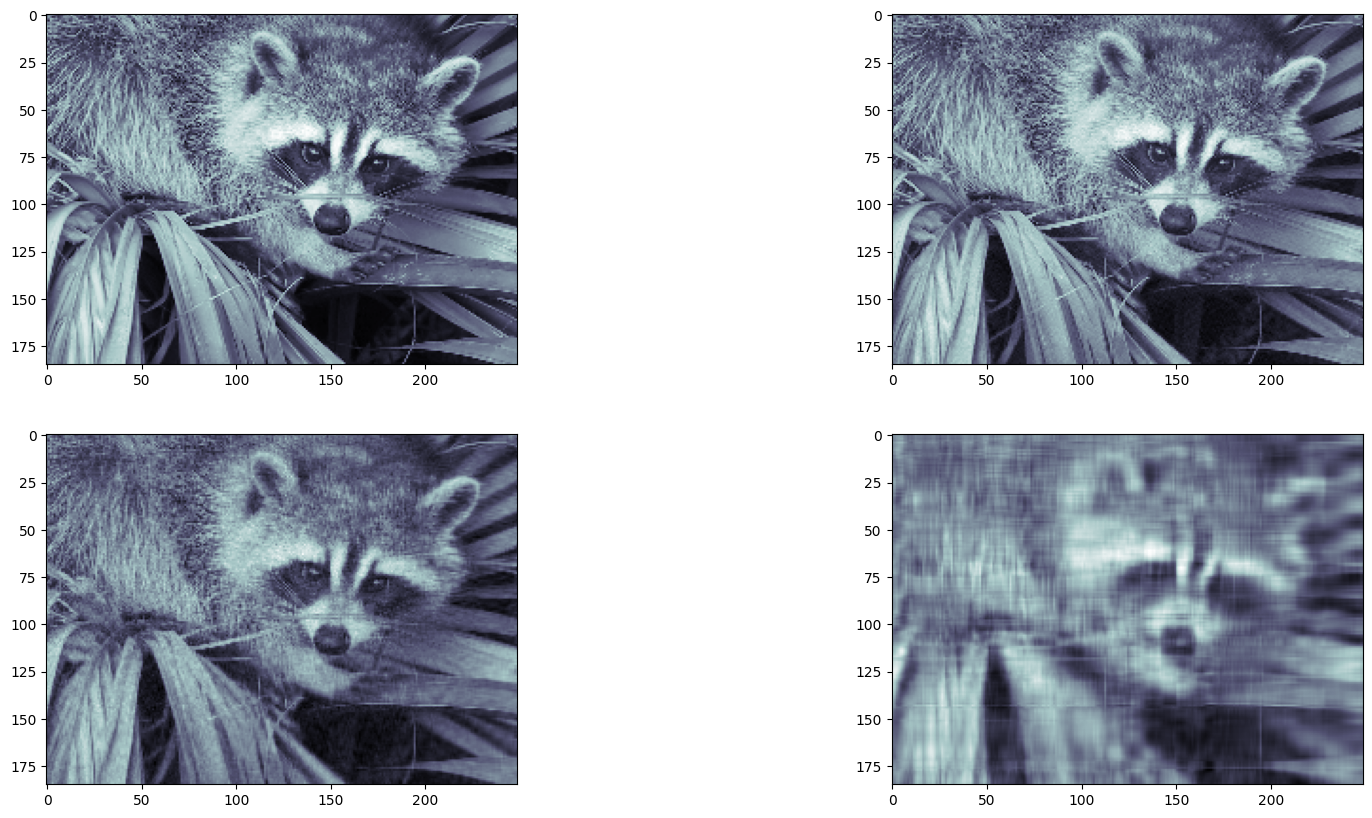

In [177]:
fig = plt.figure(figsize=(20,10))

L = [0, 120, 50, 10]
for i, l in enumerate(L):
    S_new = S2

    if i != 0:
        S2[l:, l:] = 0
        energy = np.sum(energy2[:l])
    else:
        energy = np.sum(energy2[:])

    energy_loss = (1 - energy)

    data2_reconstructed = (U2 @ S_new @ Vh2) + data2.mean(axis=0)

    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(data2_reconstructed, cmap='bone')
    print(" L= {0} : Energy {1}% and Energy loss {2}%"
                 .format(l if l!=0 else"all",round(energy*100,2), round(energy_loss*100,2)))


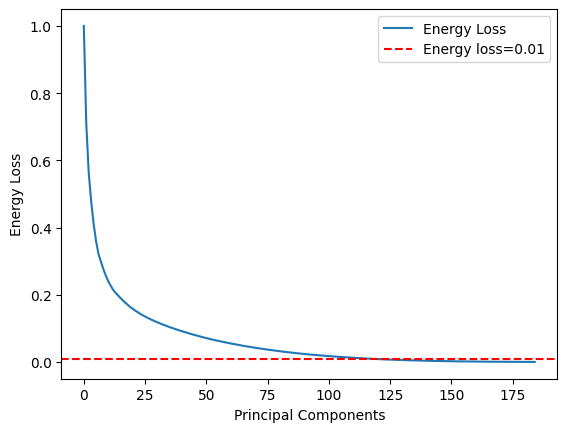

In [202]:
data_avg = np.average(data2)
data_bar = data2 - data_avg
U, S, VT = np.linalg.svd(data_bar)
size = S.size

energy = S*S/sum(S*S)
energy_loss = [] 
energy_loss_threshold = 0.01
energy_loss_index = size
for i in range(size):
    loss =  1-np.sum(energy[:i ])
    if loss < energy_loss_threshold and energy_loss_index == size:
        energy_loss_index = i
        flag = False
    energy_loss.append(loss)

sns.lineplot(energy_loss, label="Energy Loss")
plt.xlabel("Principal Components")
plt.ylabel("Energy Loss")
plt.axhline(energy_loss_threshold, color="r", xmin=0, xmax=size, linestyle="dashed", label="Energy loss="+str(energy_loss_threshold))
plt.legend()

In [180]:
# calculate how many principal components are needed to make energy lost smaller than 1%
for n in range(0, S2.shape[1]):
      energy = np.sum(energy2[:n])
      energy_loss = (1 - energy)
      if energy_loss <= 0.01:
            print(f"we need at least {n} principal components to make energy lost smaller than 1%.")
            print(f"{n} principal components lost {round(energy_loss*100,2)}% of the energy")
            break

we need at least 120 principal components to make energy lost smaller than 1%.
120 principal components lost 0.96% of the energy


# Task 3

In [218]:
data3 = pd.read_csv('data_DMAP_PCA_vadere.txt', delimiter=" ", header=None).to_numpy()
data3.shape

(1000, 30)

In [219]:
ped1 = data3[:, 0:2]
ped2 = data3[:, 2:4]

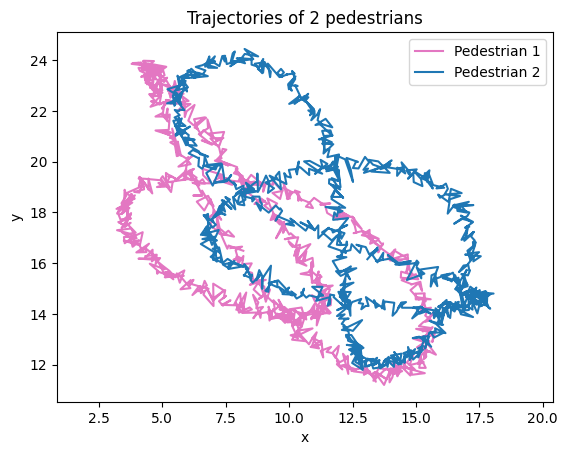

In [220]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], color='tab:pink', label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], color='tab:blue', label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
ax.set_title("Trajectories of 2 pedestrians")
ax.legend()

In [221]:
U3, S3, Vh3, energy3 = pca(data3)

S3[2:, 2:] = 0
energy = np.sum(energy3[:2])
energy_loss = (1 - energy)

data3_reconstructed = (U3 @ S3 @ Vh3) + data3.mean(axis=0)

L= 2 : Energy=84.92% and Energy loss= 15.08%


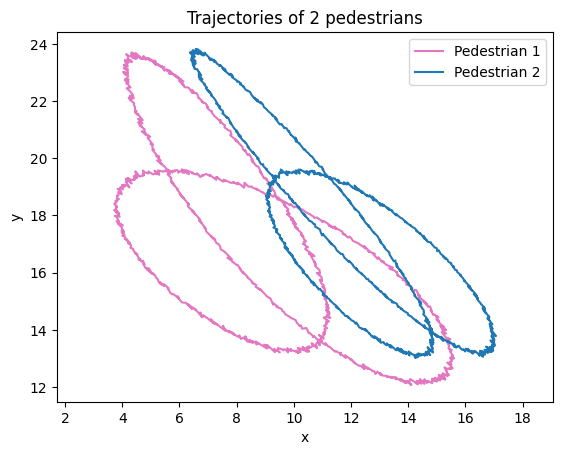

In [222]:
ped1 = data3_reconstructed[:, 0:2]
ped2 = data3_reconstructed[:, 2:4]

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], color='tab:pink', label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], color='tab:blue', label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
print(f"L= 2 : Energy={round(energy*100,2)}% and Energy loss= {round(energy_loss*100,2)}%")
ax.set_title("Trajectories of 2 pedestrians")
ax.legend()

In [223]:
# calculate how many principal components are needed to capture 90% energy
for n in range(0, S3.shape[1]):
      energy = np.sum(energy3[:n])
      if energy >= 0.9:
            print(f"we need {n} principal components to capture most of the energy.")
            print(f"{n} principal components capture {round(energy*100,2)}% of the energy")
            break

we need 3 principal components to capture most of the energy.
3 principal components capture 99.71% of the energy


In [224]:
U3, S3, Vh3, energy3 = pca(data3)

S3[3:, 3:] = 0
energy = np.sum(energy3[:3])
energy_loss = (1 - energy)

data3_reconstructed = (U3 @ S3 @ Vh3) + data3.mean(axis=0)

L= 3 : Energy=99.71% and Energy loss= 0.29%


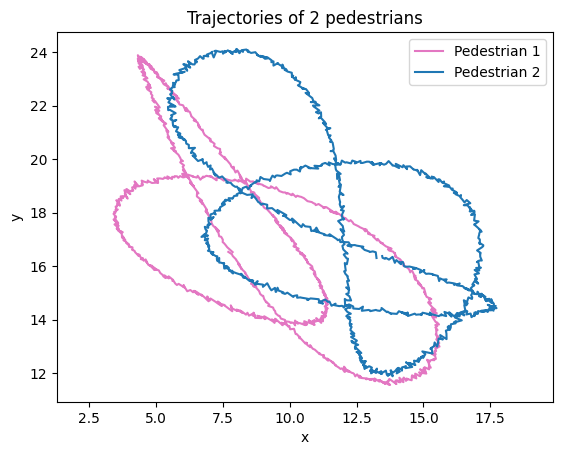

In [225]:
ped1 = data3_reconstructed[:, 0:2]
ped2 = data3_reconstructed[:, 2:4]

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], color='tab:pink', label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], color='tab:blue', label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
print(f"L= 3 : Energy={round(energy*100,2)}% and Energy loss= {round(energy_loss*100,2)}%")
ax.set_title("Trajectories of 2 pedestrians")
ax.legend()

L= 4 : Energy=99.71% and Energy loss= 0.29%


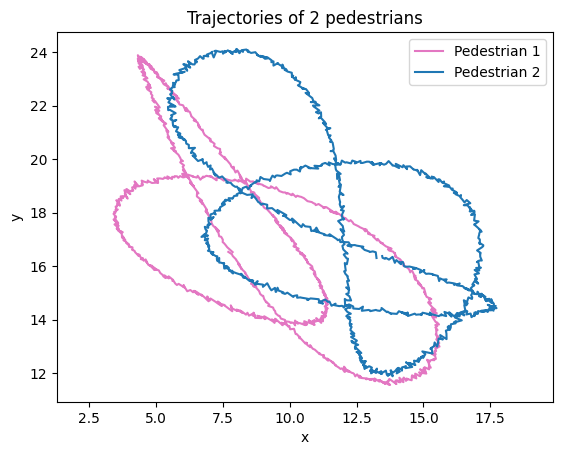

In [226]:
ped1 = data3_reconstructed[:, 0:2]
ped2 = data3_reconstructed[:, 2:4]

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(ped1[:, 0], ped1[:, 1], color='tab:pink', label="Pedestrian 1")
ax.plot(ped2[:, 0], ped2[:, 1], color='tab:blue', label="Pedestrian 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
print(f"L= 4 : Energy={round(energy*100,2)}% and Energy loss= {round(energy_loss*100,2)}%")
ax.set_title("Trajectories of 2 pedestrians")
ax.legend()

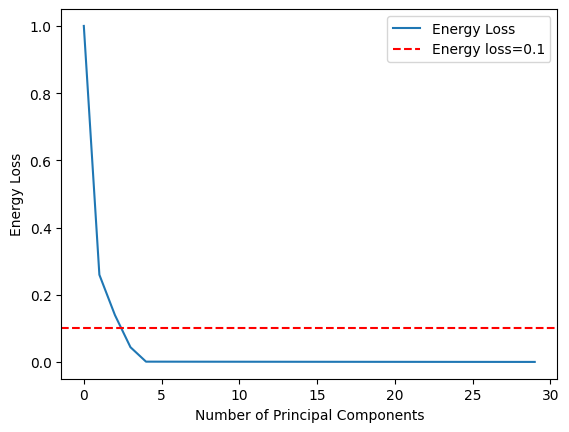

In [216]:
data_avg = np.average(data3)
data_bar = data3 - data_avg
U, S, VT = np.linalg.svd(data_bar)
size = S.size

energy = S*S/sum(S*S)
energy_loss = [] 
energy_loss_threshold = 0.1
energy_loss_index = size
for i in range(size):
    loss =  1-np.sum(energy[:i])
    if loss < energy_loss_threshold and energy_loss_index == size:
        energy_loss_index = i
        flag = False
    energy_loss.append(loss)
    
sns.lineplot(energy_loss, label="Energy Loss")
plt.xlabel("Number of Principal Components")
plt.ylabel("Energy Loss")
plt.axhline(energy_loss_threshold, color="r", xmin=0, xmax=size, linestyle="dashed", label="Energy loss="+str(energy_loss_threshold))
plt.legend()